In [2]:
import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt

from nonlinear_walk import NonlinearRandomWalk

In [62]:
email = pd.read_csv(
    "data/email-Eu-core.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)
email



,start_node,end_node
0,0,1
1,2,3
2,2,4
3,5,6
4,5,7
...,...,...
25566,420,143
25567,174,859
25568,440,460
25569,52,786


In [63]:

from networkx import Graph


def contract(g: Graph):
    """
    Contract chains of neighbouring vertices with degree 2 into one hypernode.

    Arguments:
    ----------
    g -- networkx.Graph instance

    Returns:
    --------
    h -- networkx.Graph instance
        the contracted graph

    hypernode_to_nodes -- dict: int hypernode -> [v1, v2, ..., vn]
        dictionary mapping hypernodes to nodes

    """
    
    # create subgraph of all nodes with degree 2
    is_chain = [node for node, degree in g.degree() if degree == 2]
    chains = g.subgraph(is_chain)

    # contract connected components (which should be chains of variable length) into single node
    components = [chains.subgraph(c) for c in nx.components.connected_components(chains)]
    hypernode = max(g.nodes()) +1
    hypernodes = []
    hyperedges = []
    hypernode_to_nodes = dict()
    false_alarms = []
    for component in components:
        if component.number_of_nodes() > 1:

            hypernodes.append(hypernode)
            vs = [node for node in component.nodes()]
            hypernode_to_nodes[hypernode] = vs

            # create new edges from the neighbours of the chain ends to the hypernode
            component_edges = [e for e in component.edges()]
            for v, w in [e for e in g.edges(vs) if not ((e in component_edges) or (e[::-1] in component_edges))]:
                if v in component:
                    hyperedges.append([hypernode, w])
                else:
                    hyperedges.append([v, hypernode])

            hypernode += 1

        else: # nothing to collapse as there is only a single node in component:
            false_alarms.extend([node for node in component.nodes()])

    # initialise new graph with all other nodes
    not_chain = [node for node in g.nodes() if not node in is_chain]
    h: Graph = nx.Graph(g.subgraph(not_chain + false_alarms))
    h.add_nodes_from(hypernodes)
    h.add_edges_from(hyperedges)

    return h, hypernode_to_nodes


In [75]:
G = nx.from_pandas_edgelist(email, "start_node", "end_node")
G.number_of_edges()

16706

In [76]:
# from typing import Tuple
# from networkx import Graph
# # 
# y : Tuple[Graph, list] = nx.dedensify(Ga, 2)
# G, other = y
# G.number_of_edges()

In [77]:
G

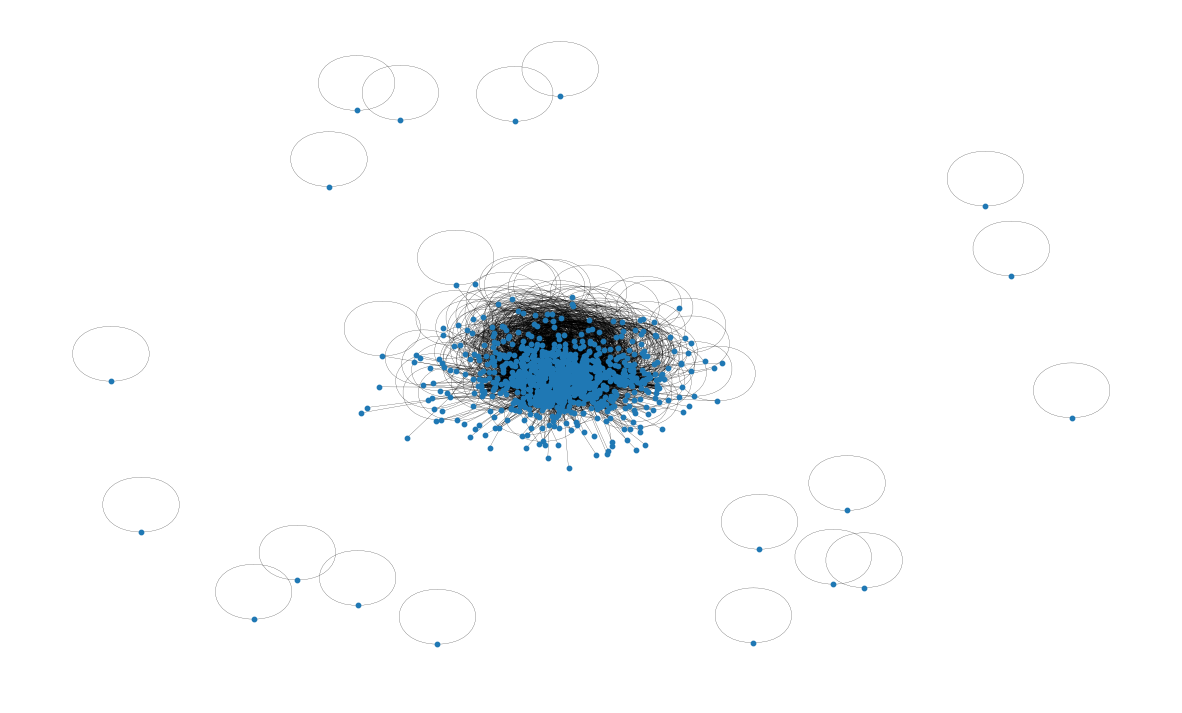

In [78]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

In [89]:
import numpy as np

initial_node = [0]
initial_pr = np.zeros(len(G))
initial_pr[initial_node] = 1 / len(initial_node)
graph_walk = NonlinearRandomWalk(G)

MovieWriter imagemagick unavailable; using Pillow instead.


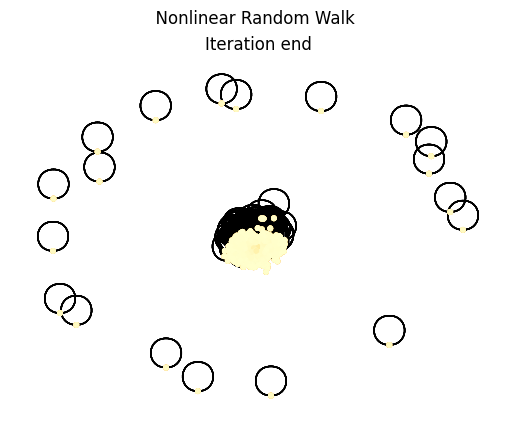

In [90]:
graph_walk.get_visualization(max_iter=2, filename="email_1iter.gif")


MovieWriter imagemagick unavailable; using Pillow instead.


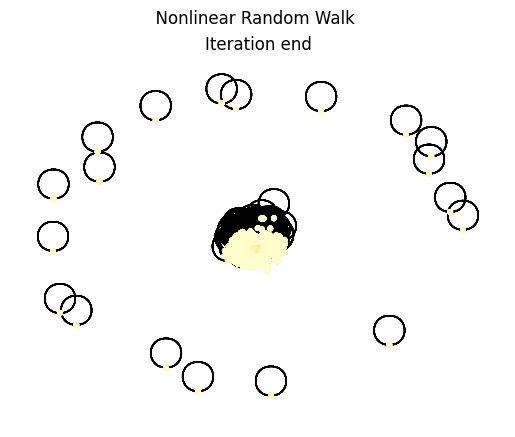

In [96]:
graph_walk.get_visualization(alpha=-5, max_iter=500, filename='email_500iter_2.gif')


In [97]:
graph_walk.calculate_for_alphas(-6, 6, 100, tol=1e-6, max_iter=200)

OSError: [Errno 22] Invalid argument: 'plots/nonlinear_random_walk-2024-01-05T16:37:17.858669.png'

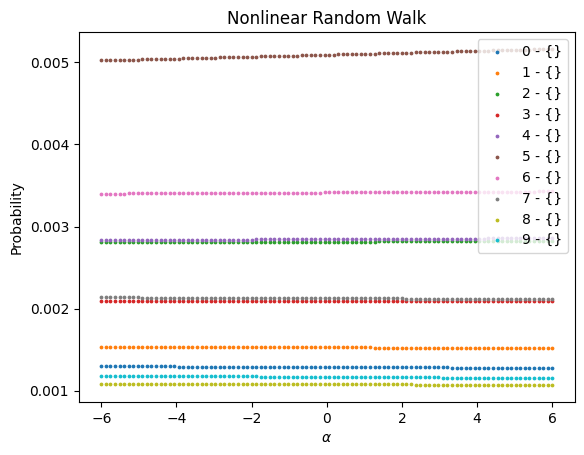

In [98]:
graph_walk.plot_for_alphas(range(0,10))

In [ ]:
graph_walk.plot_for_alphas(range(500,510))


In [ ]:
graph_walk.plot_for_alphas(range(725,735))
